<a id="import"> </a>
# <h2 style="background-color:lightblue; font-family:Arial; color:darkgreen; font-size:250%; text-align:center; border-radius:15px 50px; visibility:visible;">Step 1 | Import Libraries</h2>

⬆️ [Table of Contents](#contents_tabel)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox , skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
import warnings
import time

<a id="read"></a>
# <h2 style="background-color:lightblue; font-family:Arial; color:darkgreen; font-size:250%; text-align:center; border-radius:15px 50px; visibility:visible;">Step 2 | Read Dataset</h2>
⬆️ [Table of Contents](#contents_tabel)

In [36]:
data = pd.read_csv('D:\Customer Data.csv')
data

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\91879\AppData\Local\Temp\ipykernel_20124\1723258597.py:1: SyntaxWarning: invalid escape sequence '\C'
  data = pd.read_csv('D:\Customer Data.csv')


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


<a id="overview"></a>
# <h2 style="background-color:lightblue; font-family:Arial; color:darkgreen; font-size:250%; text-align:center; border-radius:15px 50px; visibility:visible;">Step 3 | Dataset Overview</h2>
⬆️ [Table of Contents](#contents_tabel)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [38]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [39]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [40]:
data.shape

(8950, 18)

In [41]:
continuous_features = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY',
                       'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX',
                       'PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']

In [42]:
data.describe(include='object')

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


<a id="eda"> </a>
# <h2 style="background-color:lightblue; font-family:Arial; color:darkgreen; font-size:250%; text-align:center; border-radius:15px 50px; visibility:visible;">Step 4 | EDA</h2>
⬆️ [Table of Contents](#contents_tabel)

<a id="univariate"></a>
# <h2 style="background-color:lightblue; font-family:Arial; color:darkgreen; font-size:150%; text-align:center; border-radius:15px 50px; visibility:visible;">Step 4.1 | Univariate Analysis</h2>

### Numerical Variables Univariate Analysis

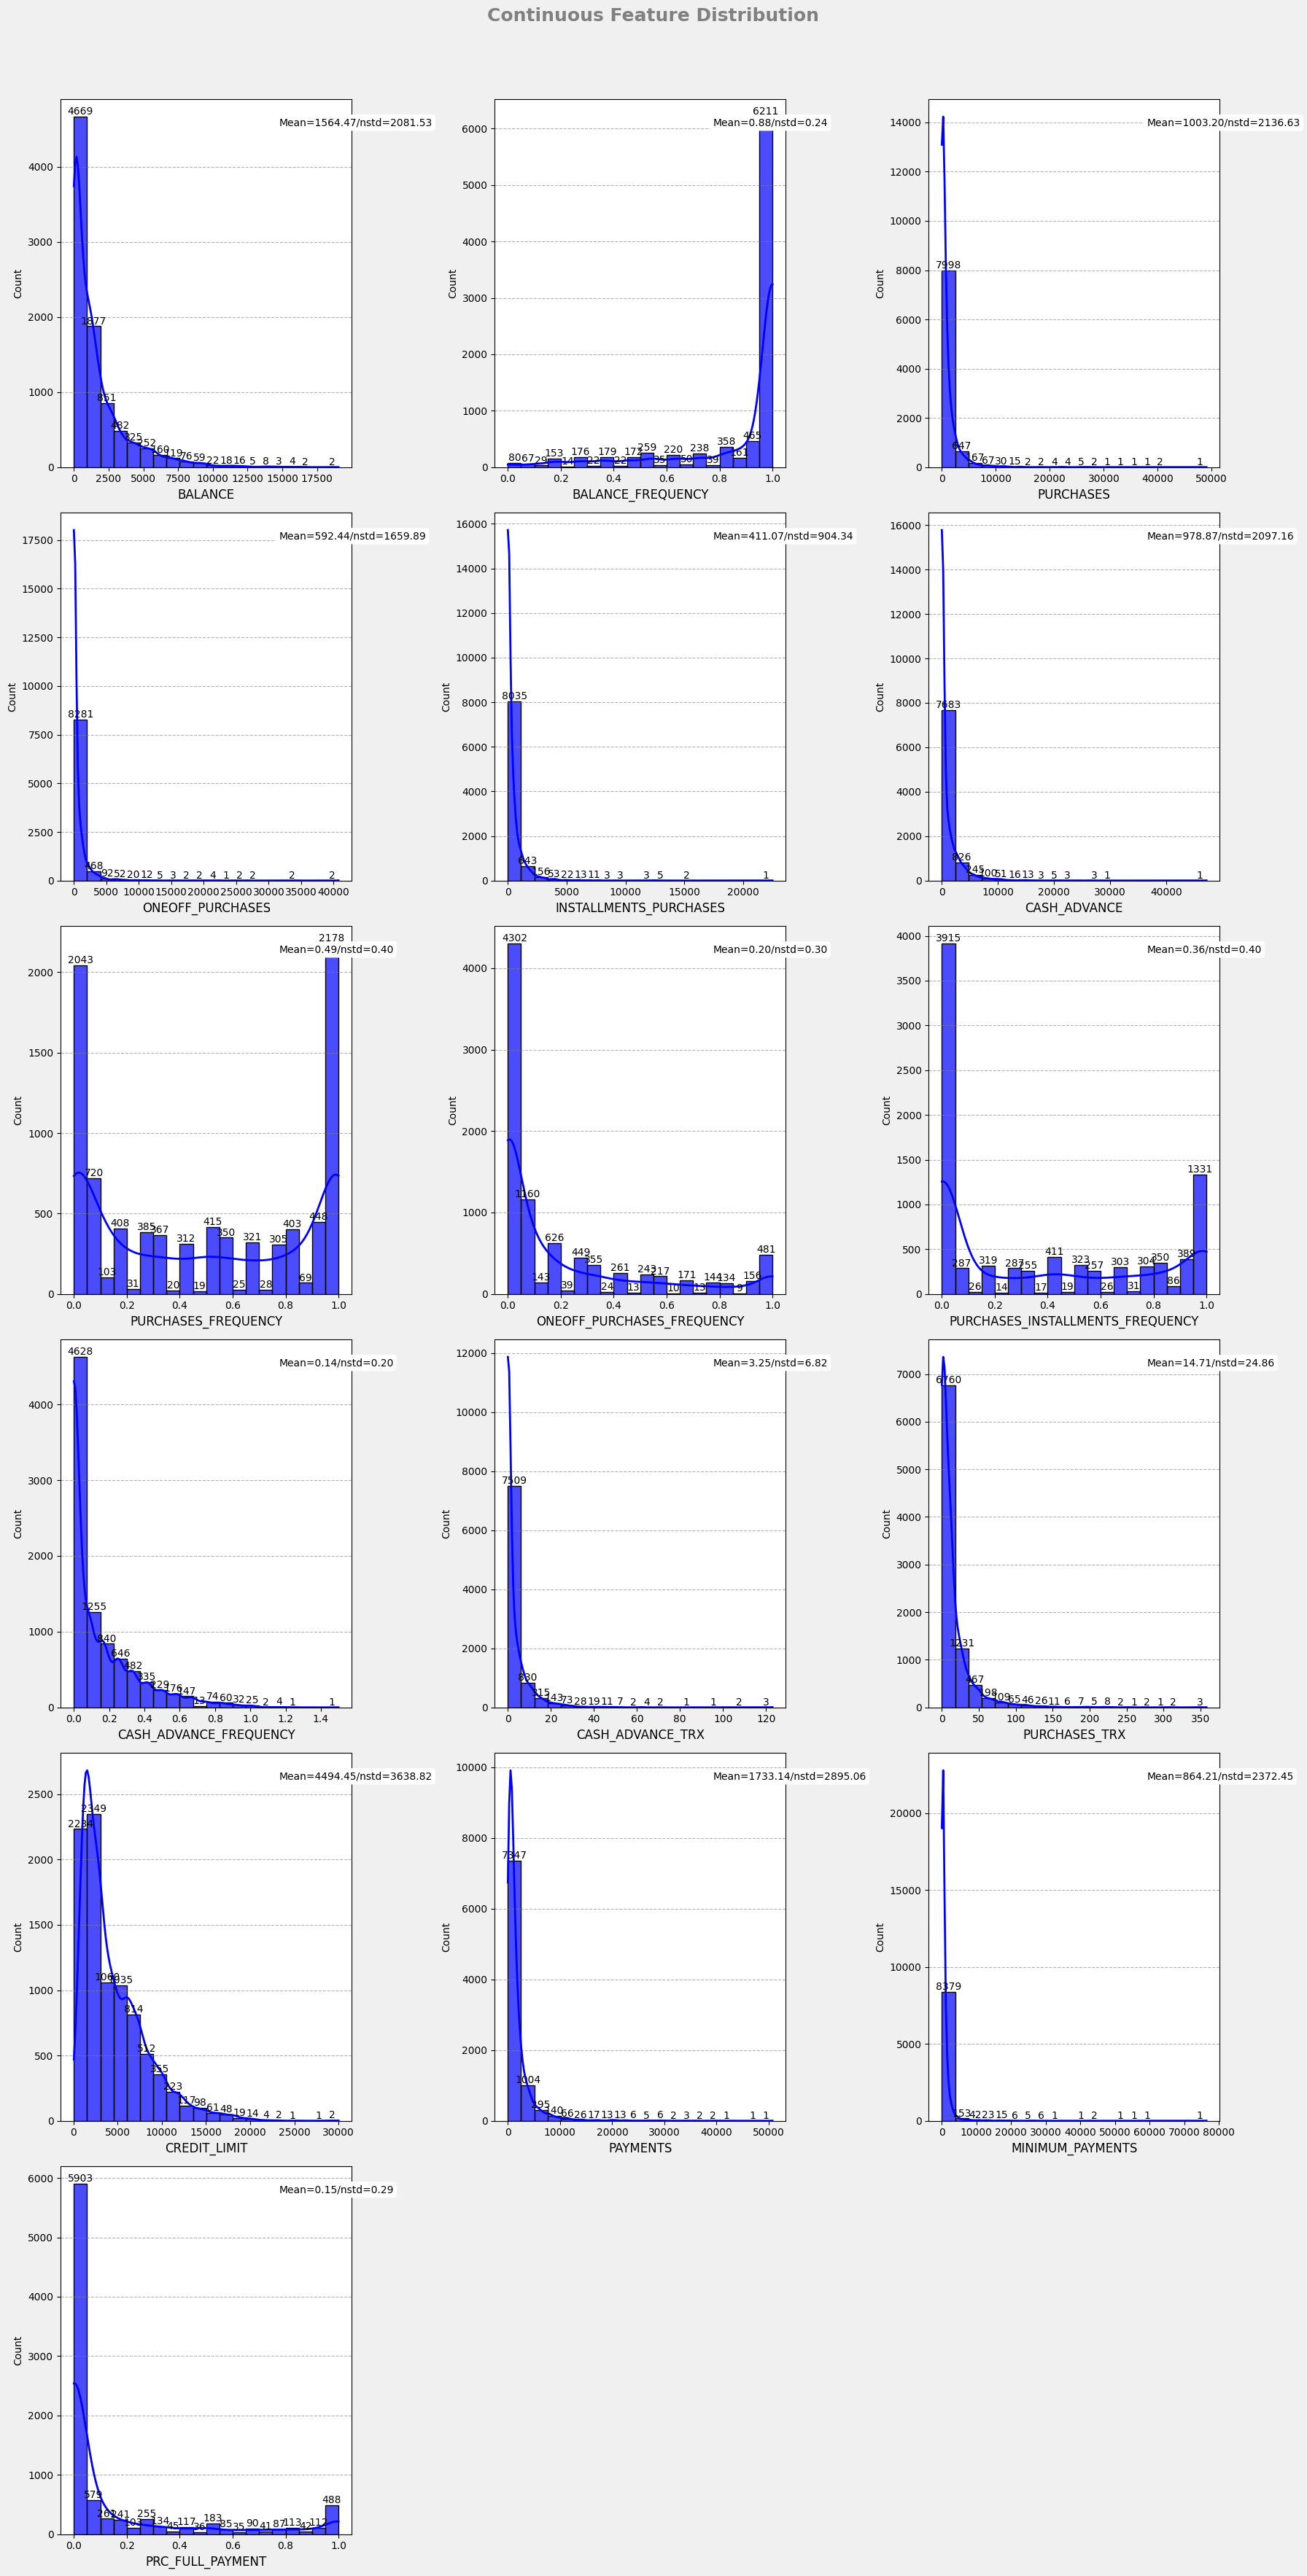

In [43]:
#Filter out continuous fetaures for the univariate analysis
df_continuous = data[continuous_features]

n_features = len(df_continuous.columns)
n_cols = 3 #Fixed number of columns for display
n_rows = (n_features // n_cols)+(n_features % n_cols>0) #Calculate required number of rows

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 6 * n_rows))
fig.patch.set_facecolor('#f0f0f0') #Setting background color

#Flatten the axes array for each iteration
axes = ax.flatten()

#loop to plot histogram for each continuous features
for i, col in enumerate(df_continuous.columns):
    #Calculate bins dynamically
    values, bin_edges = np.histogram(df_continuous[col], bins=20, range=(df_continuous[col].min(),df_continuous[col].max()))

    sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=axes[i],
                 edgecolor='black', color='blue', alpha=0.7, line_kws={'lw':2, 'color':'green'})
    
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', color='grey', alpha=0.6)

    #Adding mean and standard deviation text
    mean=df_continuous[col].mean()
    std=df_continuous[col].std()
    textstr=f'Mean={mean:.2f}/nstd={std:.2f}'
    axes[i].text(0.75,0.95, textstr, transform=axes[i].transAxes, fontsize=10,
                 verticalalignment='top', color='black',
                 bbox=dict(boxstyle='round, pad=0.3', facecolor='white', edgecolor='none'))
    
    #Annotating the counts
    for p in axes[i].patches:
        if p.get_height()>0:
            axes[i].annotate(f'{p.get_height():.0f}', (p.get_x()+ p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0,5), textcoords='offset points')

#Hide any unused subplots            
for j in range(n_features, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Continuous Feature Distribution', fontsize='18',fontweight='bold', color='grey') 
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

#### The image shows the distribution of continuous fetaure related to credit card usage. most features , such as balance , purchases and payments , exhibit a right skweness distribuation , indicating that the majority of customers fall into lower ranges for these variables , with a small number showing significantly higher values .

#### This pattern suggests that while a few customers have high spending and credit utilization, the majority are relatively moderate users.

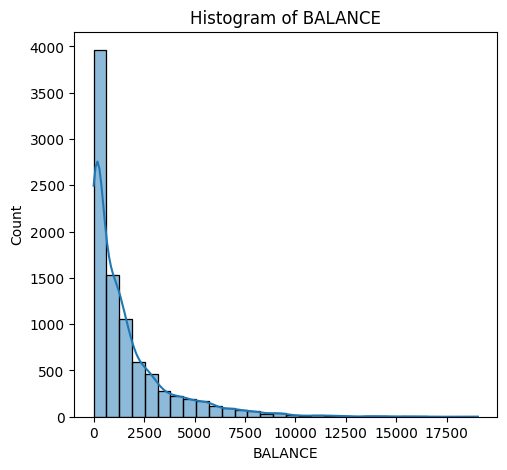

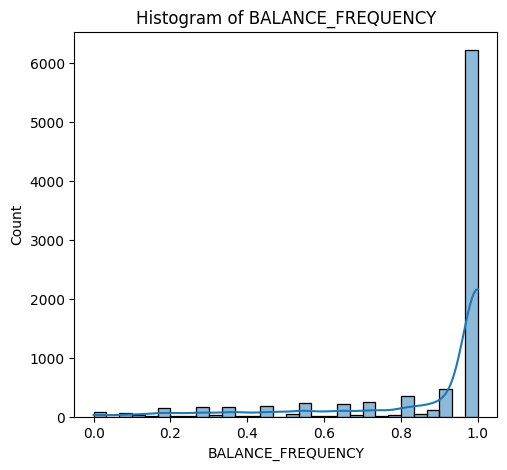

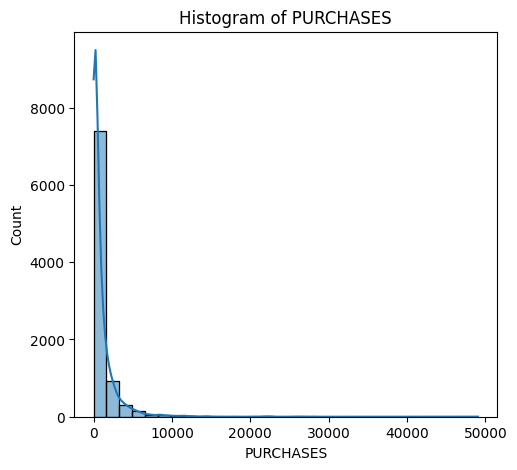

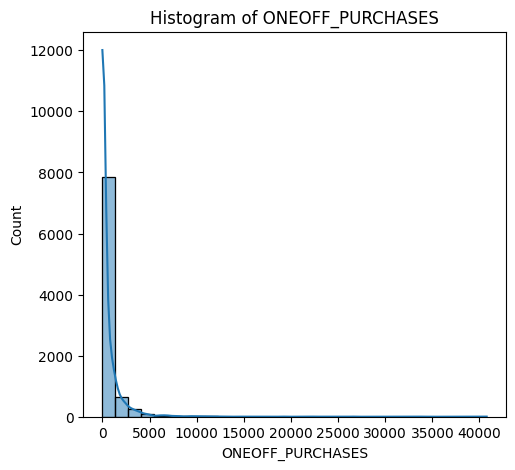

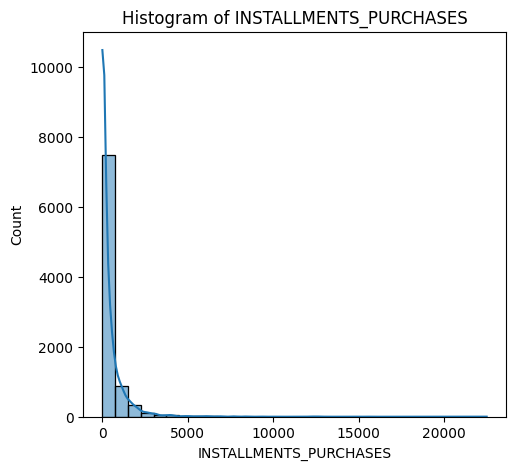

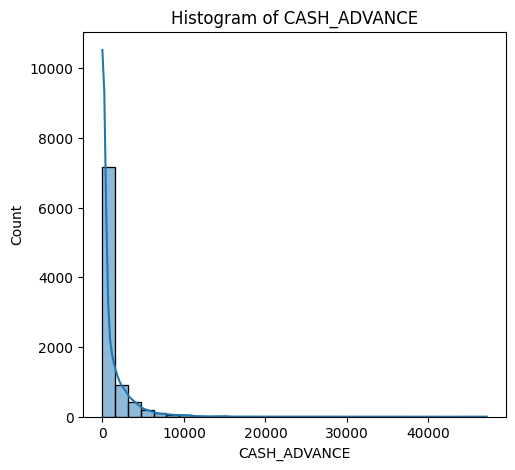

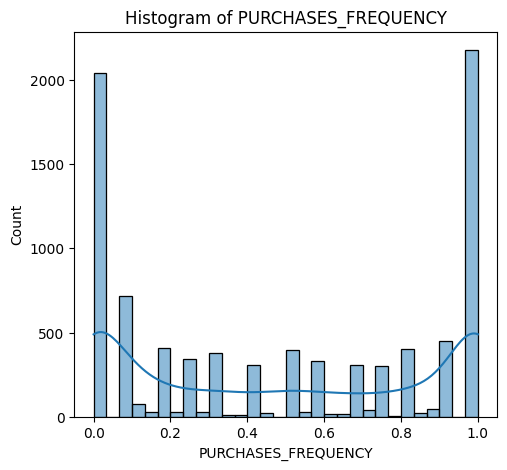

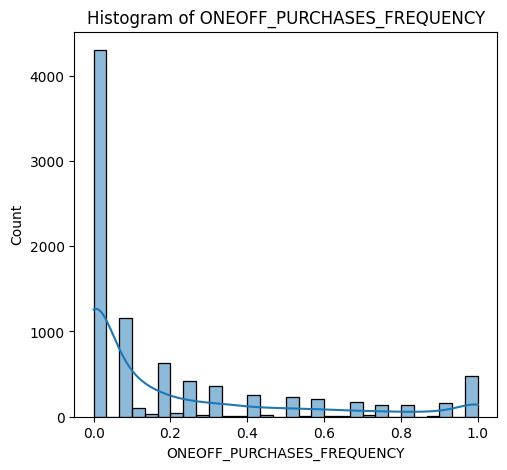

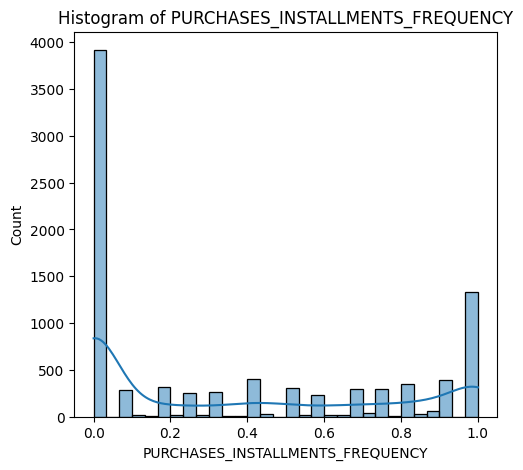

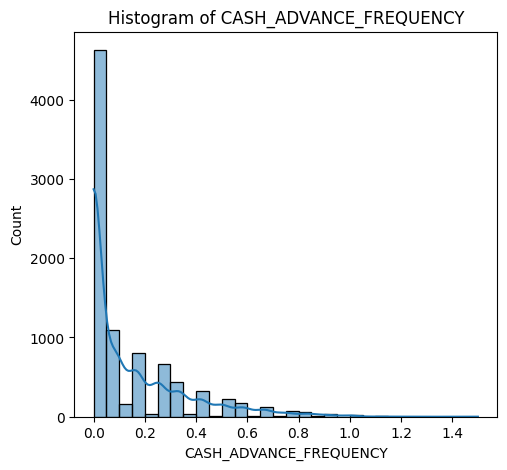

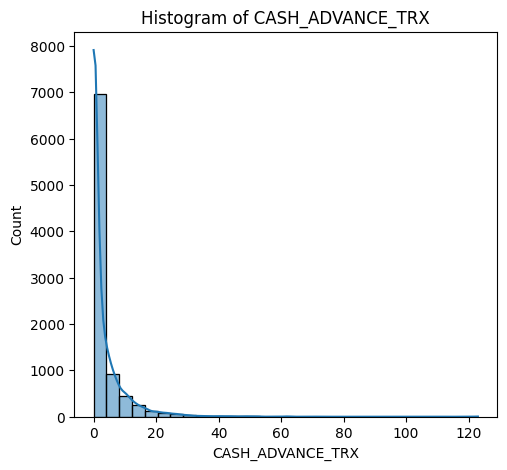

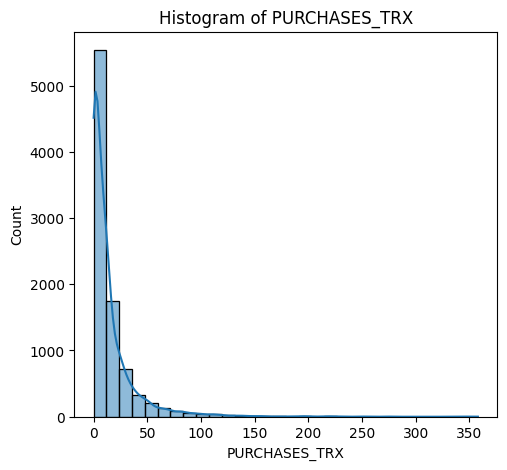

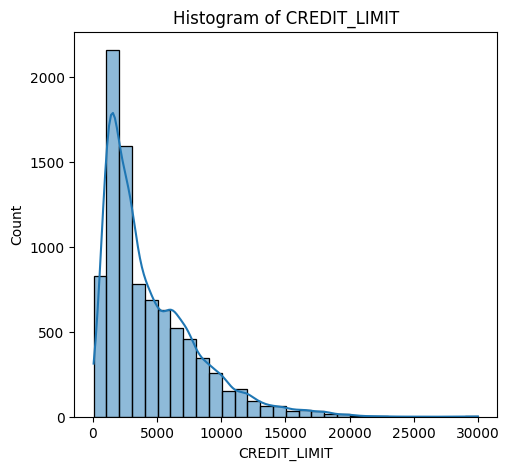

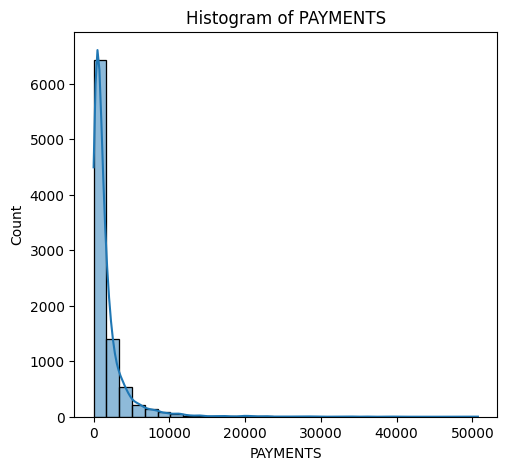

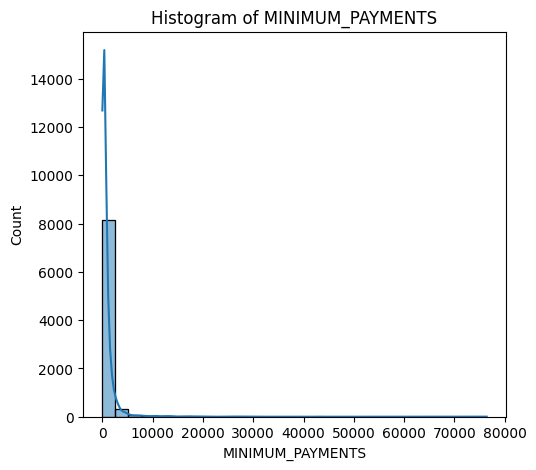

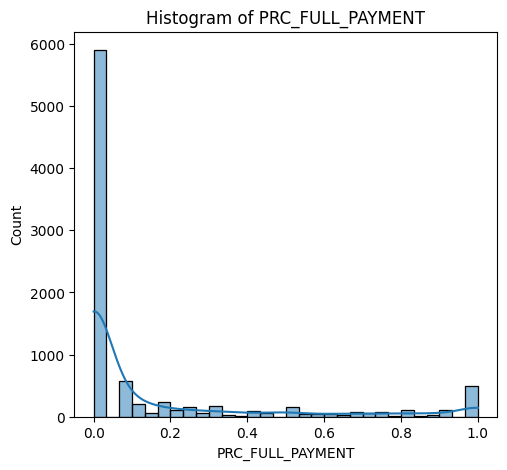

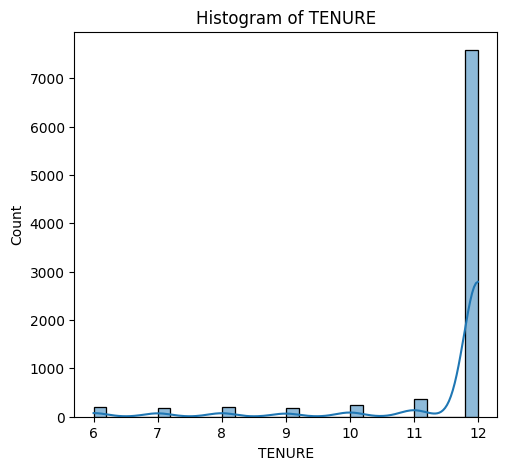

In [44]:
numerical_columns=data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

<a id="categorical"> </a>
# <h2 style="background-color:lightblue; font-family:Arial; color:darkgreen; font-size:150%; text-align:center; border-radius:15px 50px; visibility:visible;"> Categorical Variables Univariate Analysis</h2>
⬆️ [Table of Contents](#contents_tabel)

C:\Users\91879\AppData\Local\Temp\ipykernel_20124\1278658716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TENURE', data=data, palette='pastel')


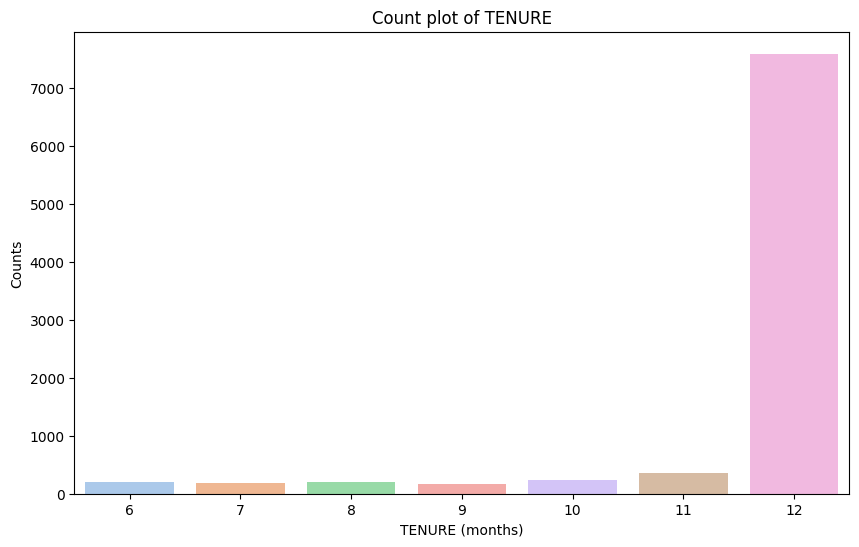

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x='TENURE', data=data, palette='pastel')
plt.title("Count plot of TENURE")
plt.xlabel("TENURE (months)")
plt.ylabel("Counts")
plt.show()

C:\Users\91879\AppData\Local\Temp\ipykernel_20124\3997492682.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TENURE', y='BALANCE', data = avg_balance_per_tenure, palette='pastel')


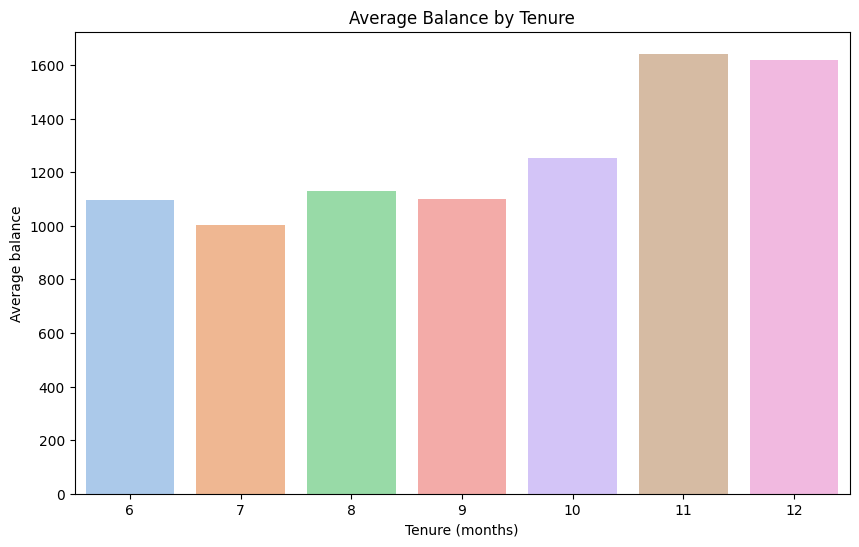

In [46]:
#Calculate average balance for each tenure group
avg_balance_per_tenure = data.groupby('TENURE')['BALANCE'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='TENURE', y='BALANCE', data = avg_balance_per_tenure, palette='pastel')
plt.xlabel('Tenure (months)')
plt.ylabel('Average balance')
plt.title('Average Balance by Tenure')
plt.show()

<a id="bivariate"> </a>
# <h2 style="background-color:lightblue; font-family:Arial; color:darkgreen; font-size:150%; text-align:center; border-radius:15px 50px; visibility:visible;"> Step 4.2 | Bivariate Analysis </h2>
⬆️ [Table of Contents](#contents_tabel)

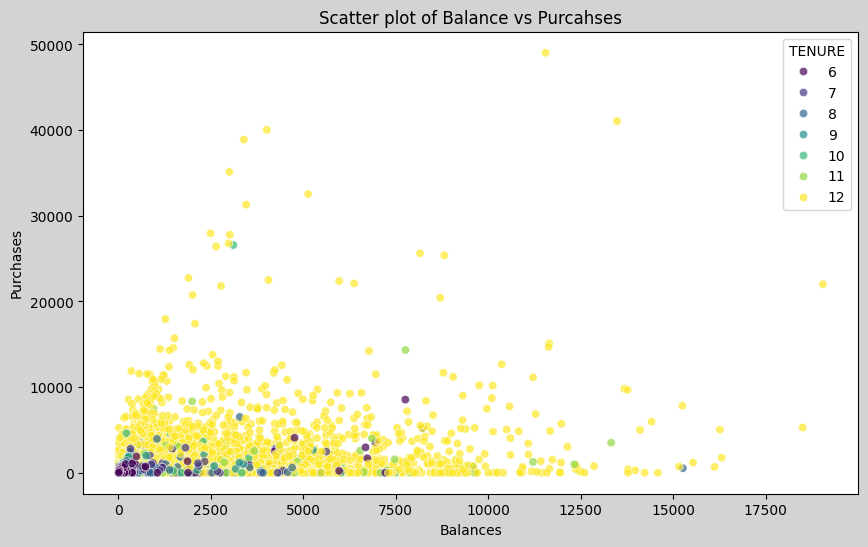

In [47]:
plt.figure(figsize = (10,6), facecolor='lightgrey')
sns.scatterplot(x='BALANCE', y='PURCHASES' ,data=data , hue='TENURE', palette='viridis', alpha=0.7)
plt.title('Scatter plot of Balance vs Purcahses')
plt.xlabel('Balances')
plt.ylabel('Purchases')
plt.legend(title='TENURE', loc='upper right')
plt.show()

### Scatterplot will help us to explore the relationship between the credit limit of customers and their payment amounts.

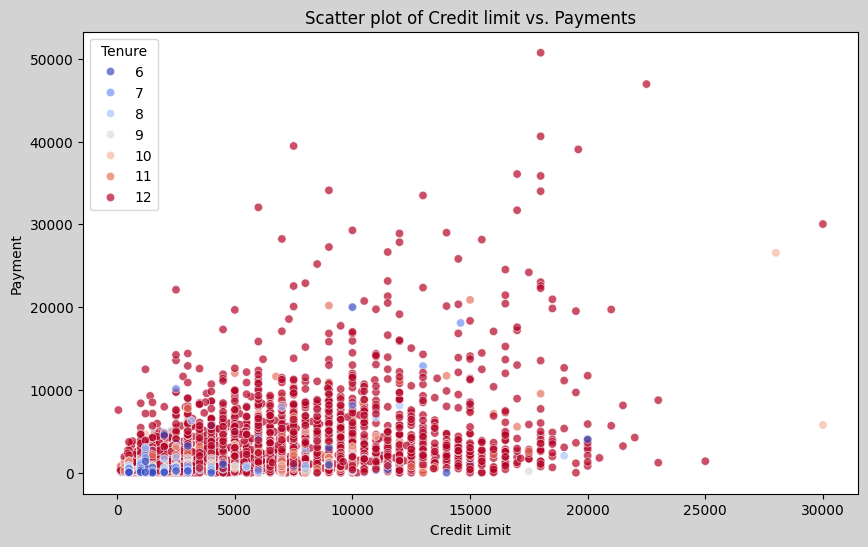

In [48]:
plt.figure(figsize = (10,6), facecolor='lightgrey')
sns.scatterplot(x='CREDIT_LIMIT', y='PAYMENTS', data=data, hue = 'TENURE', palette='coolwarm', alpha=0.7)
plt.title('Scatter plot of Credit limit vs. Payments')
plt.xlabel('Credit Limit')
plt.ylabel('Payment')
plt.legend(title='Tenure', loc='upper left')
plt.show()

### Scatter plot showing the relationship between cash advances taken by customers and how frequantly they take these advances.

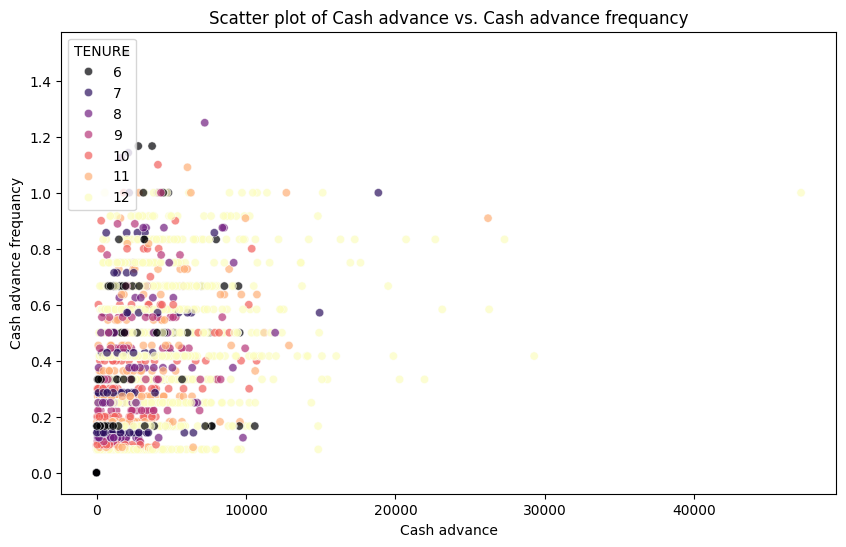

In [49]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='CASH_ADVANCE', y='CASH_ADVANCE_FREQUENCY', data=data, hue='TENURE', palette='magma', alpha=0.7)
plt.title('Scatter plot of Cash advance vs. Cash advance frequancy')
plt.xlabel('Cash advance')
plt.ylabel('Cash advance frequancy')
plt.legend(title='TENURE', loc='upper left')
plt.show()

### **Scatterplot**: Looks for Linear and Non-Linear relationships between variables. For eg: a cluster of points might suggest a group of customers with similar behaviour.

### **KDEplots**: These plots on the diagonal show thw diatribution of each variable , helping identify skewness or multimodel distributions.

### **Clusterss or Patterns** : clusters in the scatter plots could indicate natural customer segments based on their financial behaviours.

<Figure size 1000x800 with 0 Axes>

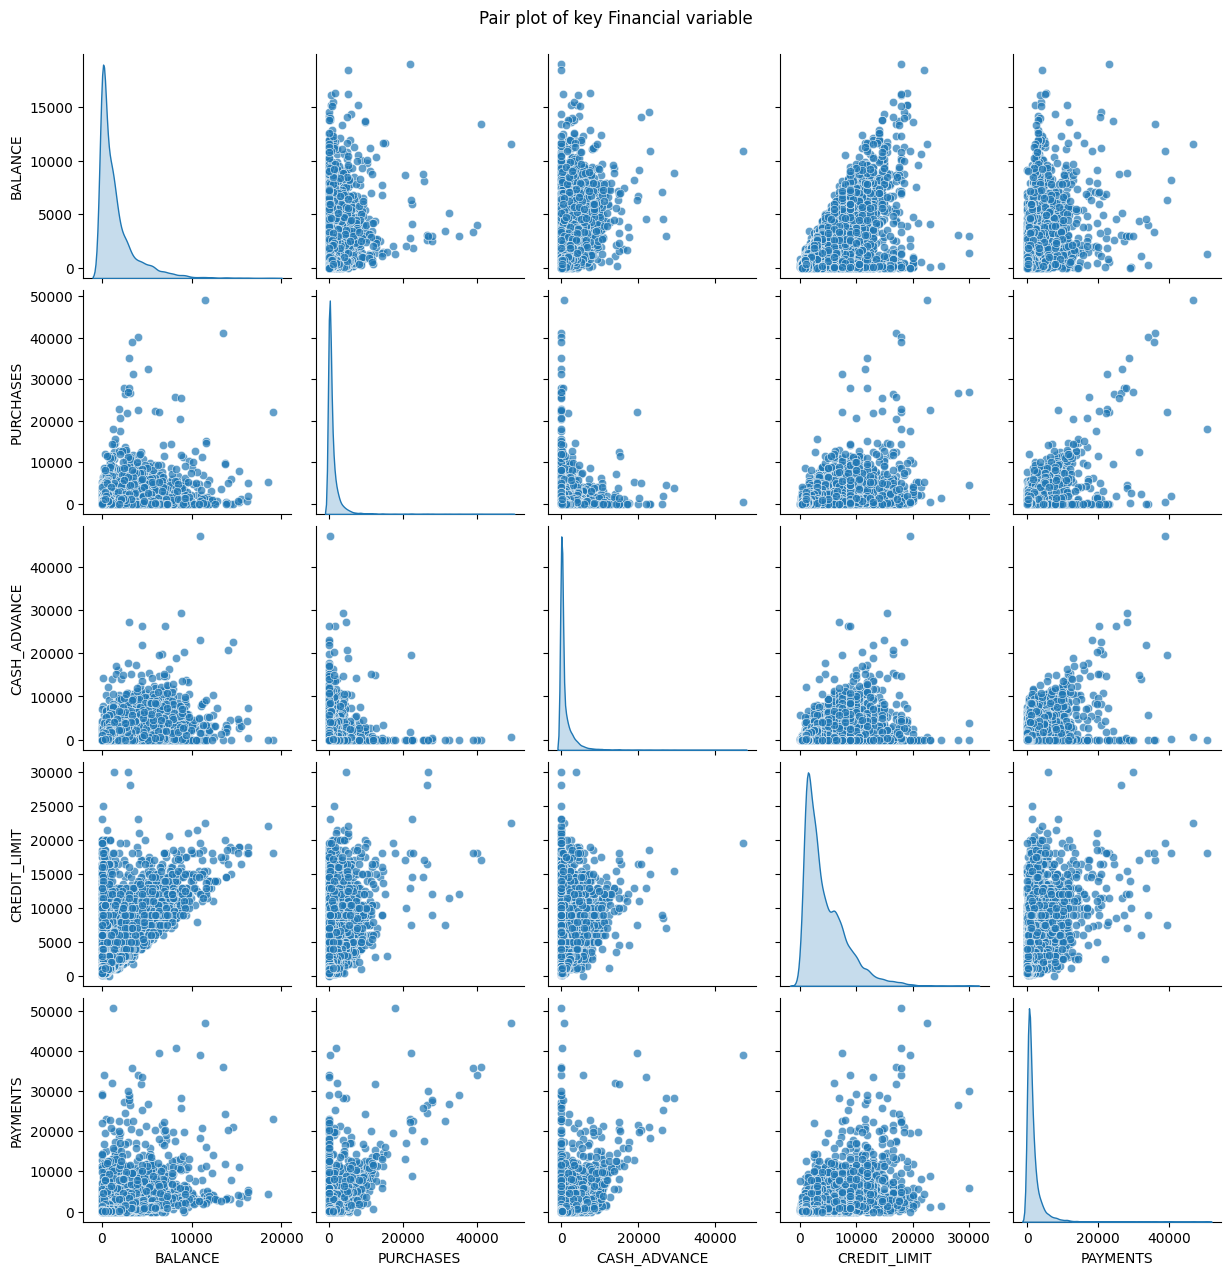

In [50]:
# Select a subset of columns to include in pair plot
pairplot_columns = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']

plt.figure(figsize=(10,8))
sns.pairplot(data[pairplot_columns], diag_kind='kde', plot_kws={'alpha':0.7})
plt.suptitle('Pair plot of key Financial variable', y=1.02)
plt.show()

### By using this correlation heatmap , you can gain insights into the realtionships between different financial behaviors in your dataset.

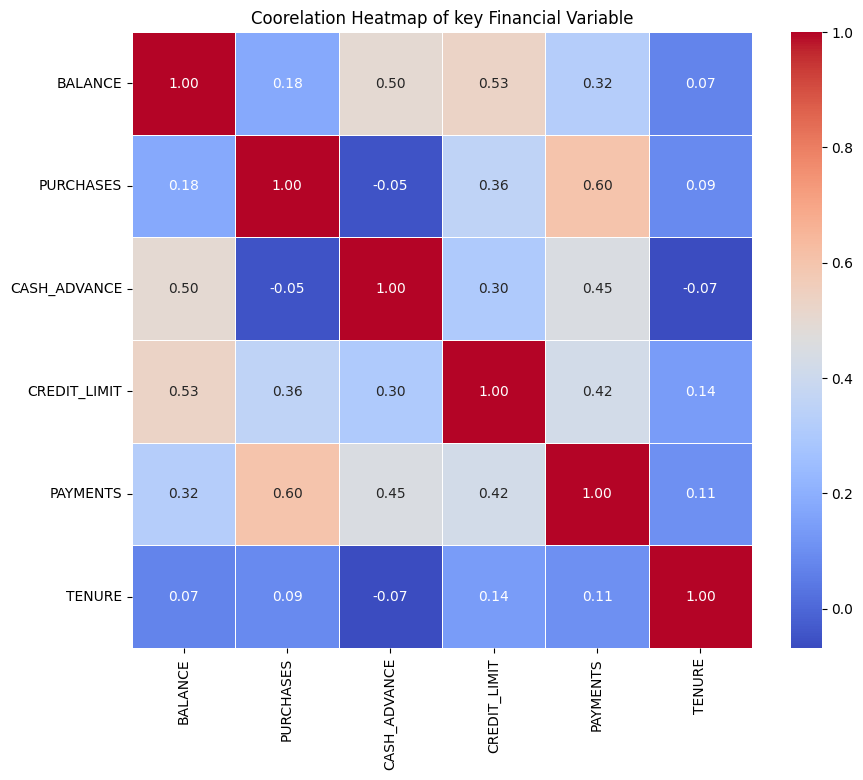

In [51]:
#Calculate the correlation matrix for numerical varaibales.
correlation_matrix = data[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'TENURE']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Coorelation Heatmap of key Financial Variable')
plt.show()

<a id="overview"></a>
# <h2 style="background-color:lightblue; font-family:Arial; color:darkgreen; font-size:250%; text-align:center; border-radius:15px 50px; visibility:visible;">Here's the code to create a joint plot for Balance and Purchases</h2>
⬆️ [Table of Contents](#contents_tabel)

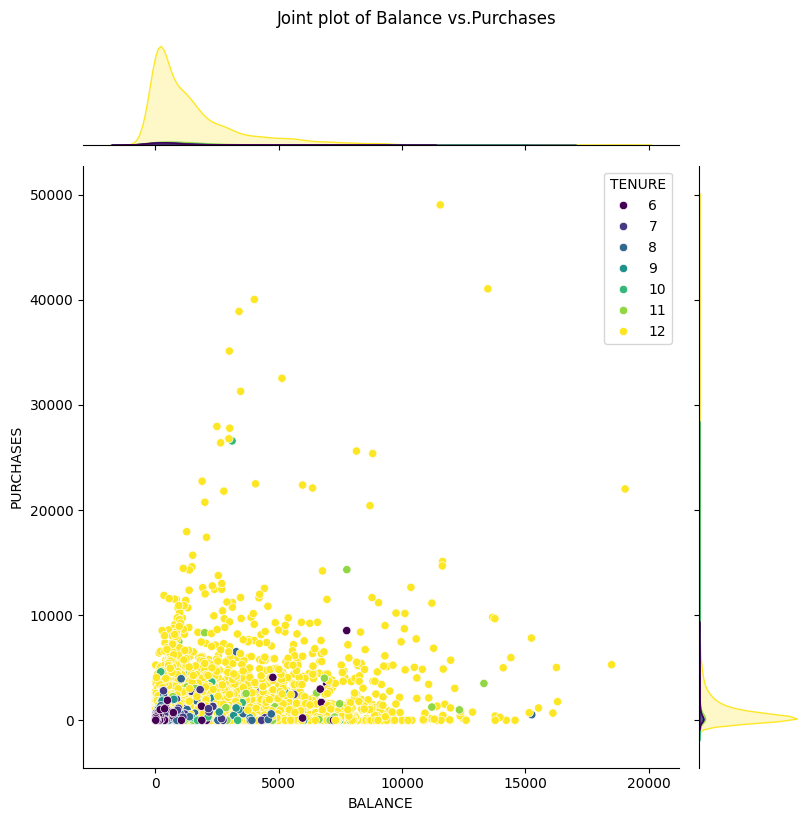

In [52]:
#Create a joint plot for Balance vs. Purchases
sns.jointplot(x='BALANCE', y='PURCHASES', data=data, kind='scatter', hue='TENURE', palette='viridis', height=8)
plt.suptitle('Joint plot of Balance vs.Purchases', y=1.02)
plt.show()

### **Shape and Spread** : the width of each voilin shows thw distribuation density of the ****Balance**** for each ****Tenure**** category. Wider section represent a higher density of customers with those balances.

### **Median and Quartiles** : the white dot inside the violin represents the median, and the thick black bar in the center represents the interquartile range (IQR).

### **Outliers and Variablity** : the plot also shows outliers as points outside the violins, and the overall shape indicates varaibility within each tenure group.

C:\Users\91879\AppData\Local\Temp\ipykernel_20124\3368850400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TENURE', y='BALANCE', data=data, palette='viridis')


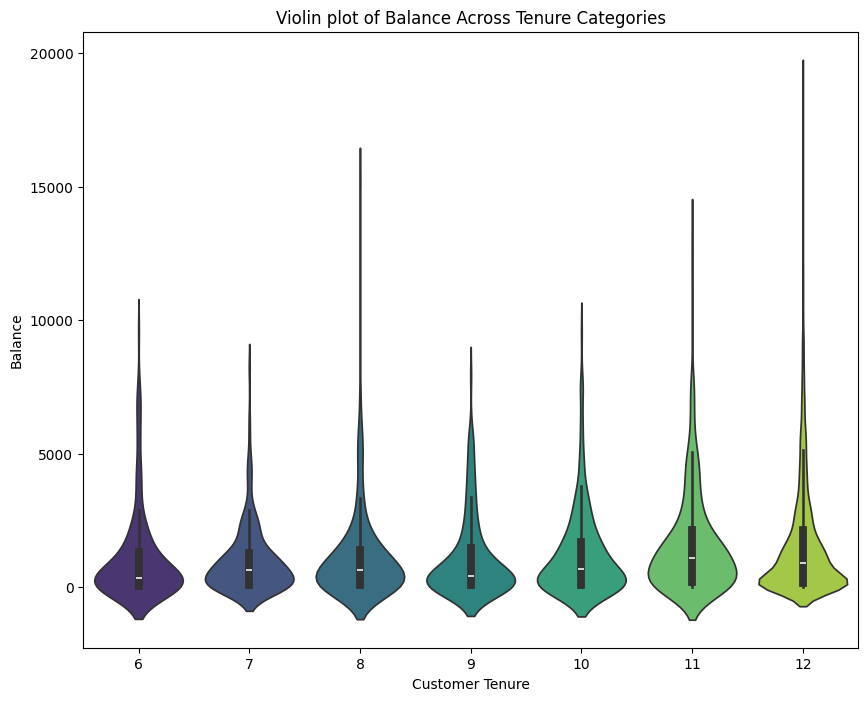

In [53]:
plt.figure(figsize=(10,8))
sns.violinplot(x='TENURE', y='BALANCE', data=data, palette='viridis')
plt.title('Violin plot of Balance Across Tenure Categories')
plt.xlabel('Customer Tenure')
plt.ylabel('Balance')
plt.show()

<a id="preprocessing"> </a>
# <h2 style="background-color:lightblue; font-family:Arial; color:darkgreen; font-size:250%; text-align:center; border-radius:15px 50px; visibility:visible;">Step 5 | Data Preprocessing</h2>
⬆️ [Table of Contents](#contents_tabel)

<a id="missingvalue"></a>
# <h2 style="background-color:lightblue; font-family:Arial; color:darkgreen; font-size:150%; text-align:center; border-radius:15px 50px; visibility:visible;">Step 5.1 | Missing Value Treatment</h2>

In [54]:
#Handling missing values
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())

In [55]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<a id="outlier"> </a>
# <h2 style="background-color:lightblue; font-family:Arial; color:darkgreen; font-size:150%; text-align:center; border-radius:15px 50px; visibility:visible;">Step 5.2 | Outlier Treatment</h2>
⬆️ [Table of Contents](#contents_tabel)

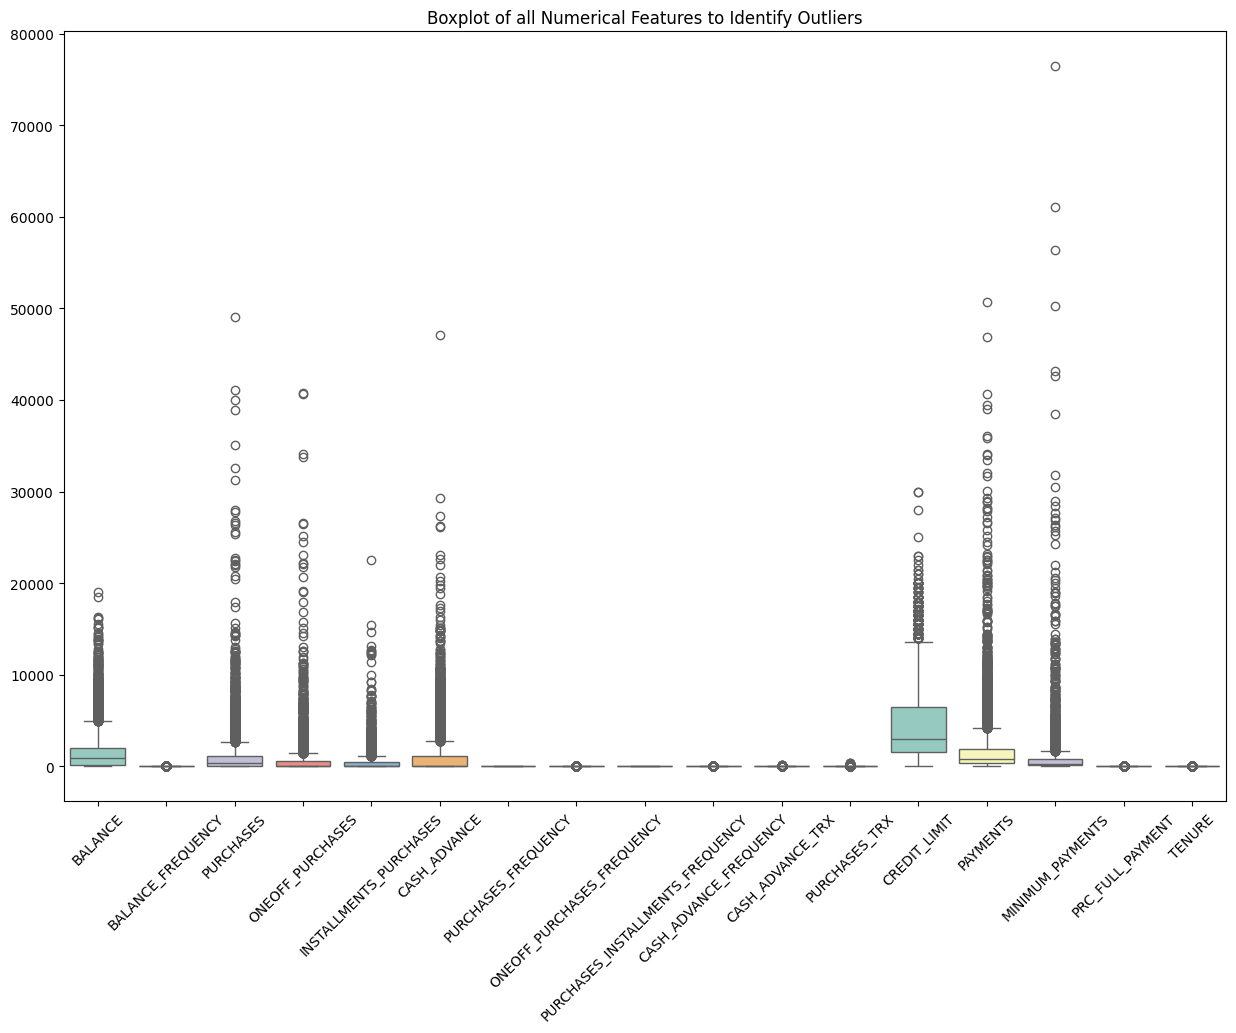

In [56]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data.select_dtypes(include='number'), palette='Set3')
plt.xticks(rotation=45)
plt.title('Boxplot of all Numerical Features to Identify Outliers')
plt.show()

In [57]:
continuous_features

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']

In [58]:
Q1 = data[continuous_features].quantile(0.25)
Q3 = data[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((data[continuous_features] < (Q1 - 1.5 * IQR)) | (data[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     909
PRC_FULL_PAYMENT                    1474
dtype: int64

In [59]:
data.drop('CUST_ID', axis=1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


<a id="outlier"> </a>
# <h2 style="background-color:lightblue; font-family:Arial; color:darkgreen; font-size:200%; text-align:center; border-radius:15px 50px; visibility:visible;">1. Impute with Median</h2>


In [60]:
#Replace outlier with median
def replace_outlier_with_median(data):
    for column in data.columns:
        if data[column].dtype in ['int64', 'float64']:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Replace outlier with median
            median = data[column].median()
            data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return data

continuous_features = data.select_dtypes(include=['int64', 'float64']).columns

#Loop until outliers count becomes zero
while True:
    #Calculate IQR
    Q1 = data[continuous_features].quantile(0.25)
    Q3 = data[continuous_features].quantile(0.75)
    IQR = Q3 - Q1
    outliers_count_specified = ((data[continuous_features] < (Q1 - 1.5 * IQR)) |
                                (data[continuous_features] > (Q3 + 1.5 * IQR))).sum()
    
    #Break the loop if no outlier is left
    if outliers_count_specified.sum() == 0:
        break

    # Apply function to replace outlier with median
    data = replace_outlier_with_median(data)

In [61]:
Q1 = data[continuous_features].quantile(0.25)
Q3 = data[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((data[continuous_features] < (Q1 - 1.5 * IQR)) | (data[continuous_features] > (Q3 +1.5 * IQR))).sum()
outliers_count_specified

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [62]:
data.shape

(8950, 18)

In [63]:
data.to_excel('Credit_Card_cleaned.xlsx', index = False)

In [64]:
data_cleaned = pd.read_excel('Credit_Card_cleaned.xlsx') 
data_cleaned.shape

(8950, 18)

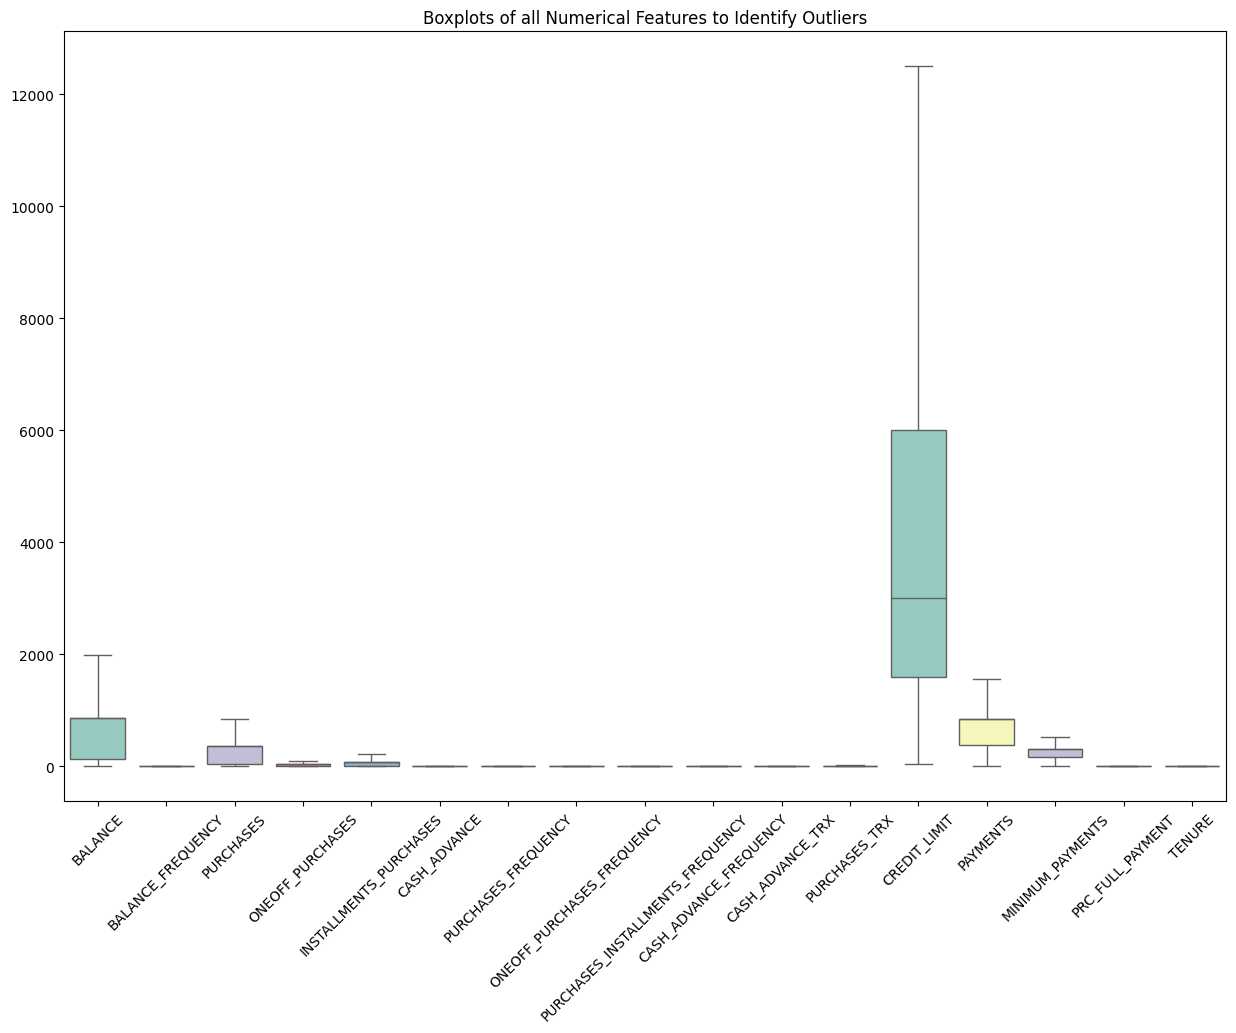

In [65]:
#Create boxplots for all numerical features in the dataset.
plt.figure(figsize=(15,10))
sns.boxplot(data = data_cleaned.select_dtypes(include='number'), palette='Set3')
plt.xticks(rotation=45)
plt.title('Boxplots of all Numerical Features to Identify Outliers')
plt.show()

<a id="overview"></a>
# <h2 style="background-color:lightblue; font-family:Arial; color:darkgreen; font-size:250%; text-align:center; border-radius:15px 50px; visibility:visible;">Data Splitting</h2>
⬆️ [Table of Contents](#contents_tabel)

In [67]:
df = pd.read_excel('Credit_Card_cleaned.xlsx')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,1,95.40000,0.0,95.4,0,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0,12
1,C10002,873.163945,1,0.00000,0.0,0.0,0,0.000000,0.000000,0.000000,0.250000,0,0,7000.0,856.820966,312.343947,0,12
2,C10003,873.099403,1,773.17000,38.0,0.0,0,1.000000,0.083333,0.000000,0.000000,0,12,7500.0,622.066742,312.343947,0,12
3,C10004,1666.670542,1,361.12250,38.0,0.0,0,0.083333,0.083333,0.000000,0.083333,0,1,7500.0,0.000000,312.343947,0,12
4,C10005,817.714335,1,16.00000,16.0,0.0,0,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1,291.12000,0.0,89.0,0,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0,12
8946,C19187,19.183215,1,300.00000,0.0,89.0,0,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0,12
8947,C19188,23.398673,1,144.40000,0.0,144.4,0,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0,12
8948,C19189,13.457564,1,0.00000,0.0,0.0,0,0.000000,0.000000,0.000000,0.166667,0,0,500.0,52.549959,55.755628,0,12
